## Berikut adalah projek 3
Soal-soal terkahir dari kami sebagai pengajar Data Science Indonesia Regional Jawa Timur

### <i>Dataset (no 1 dan 2)</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from seaborn import pairplot
from collections import Counter
from matplotlib import gridspec

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data.csv")
data

CYT   NUC   MIT   ME3   ME2  ME1  EXC   VAC   POX
0     ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1     ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2     ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3     AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4     AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
...          ...   ...   ...   ...   ...  ...  ...   ...   ...
1479  YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22
1480  ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47
1481  ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22
1482  ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39
1483  G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22

[1484 rows x 9 columns]

In [3]:
np.sum(data.isnull())

CYT    0
NUC    0
MIT    0
ME3    0
ME2    0
ME1    0
EXC    0
VAC    0
POX    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CYT     1484 non-null   object 
 1   NUC     1484 non-null   float64
 2   MIT     1484 non-null   float64
 3   ME3     1484 non-null   float64
 4   ME2     1484 non-null   float64
 5   ME1     1484 non-null   float64
 6   EXC     1484 non-null   float64
 7   VAC     1484 non-null   float64
 8   POX     1484 non-null   float64
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [5]:
no_cyt = data.iloc[:,1:9]
no_cyt

NUC   MIT   ME3   ME2  ME1  EXC   VAC   POX
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
...    ...   ...   ...   ...  ...  ...   ...   ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22

[1484 rows x 8 columns]

Data di atas digunakan untuk menyelesaikan soal nomor satu dan dua. Adapun keterangan pada <i>dataset</i> dapat dilihat pada file yang bernama <b>Info.names</b>. <i>Dataset</i> di atas memiliki 1484 baris dan 9 kolom. Mengingat soal nomor satu dan dua bukan ditekankan pada <i>Exploratory Data Analysis</i> maka untuk menjawab soal nomor satu dan dua tidak perlu menunjukan visualisasi dari data di atas.

## 1. <i>Unsupervised Learning</i>

### Latih Algoritma K-Means

In [6]:
sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(no_cyt)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

##### Elbow Method Chart

In [7]:
sum_of_squared_distances

{1: 123.4778340296498,
 2: 95.83129556833937,
 3: 80.64452683333253,
 4: 71.31498742232733,
 5: 64.14364255389573,
 6: 60.400541655068686,
 7: 57.91587542357354,
 8: 50.024524900119545,
 9: 47.89435566634454,
 10: 45.789765097151374}

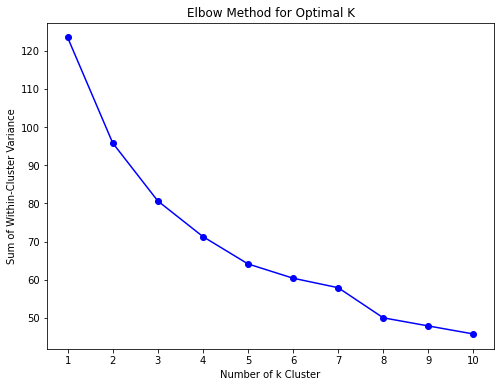

In [8]:
plt.figure(figsize = (8,6))

plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of k Cluster")
plt.ylabel("Sum of Within-Cluster Variance")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sum_of_squared_distances.values(),
        '-o', color = "Blue")

plt.show()

In [9]:
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(no_cyt)
    score = silhouette_score(no_cyt, preds, metric = "euclidean")
    
    sil[n_cluster] = score

##### Silhouette

In [10]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.26428226568331237
3 : 0.26712238050533
4 : 0.26083500806419563
5 : 0.20695748010431753
6 : 0.19772120192909265
7 : 0.16761843053518455
8 : 0.18176816701386214
9 : 0.17128073440127095
10 : 0.1697453339687665


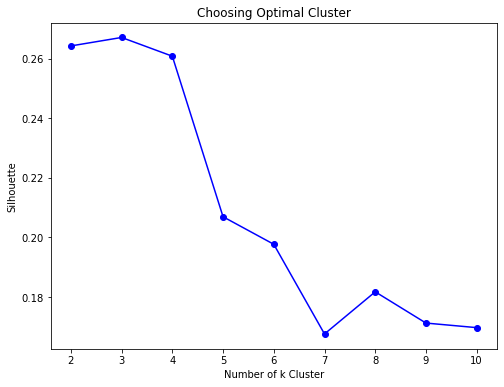

In [11]:
plt.figure(figsize = (8,6))

plt.title("Choosing Optimal Cluster")
plt.xlabel("Number of k Cluster")
plt.ylabel("Silhouette")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sil.values(),
        '-o', color = "Blue")

plt.show()

In [12]:
kmean = KMeans(n_clusters = 5)
data['category'] = kmean.fit_predict(no_cyt)
data

CYT   NUC   MIT   ME3   ME2  ME1  EXC   VAC   POX  category
0     ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22         2
1     ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22         0
2     ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22         2
3     AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22         0
4     AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22         1
...          ...   ...   ...   ...   ...  ...  ...   ...   ...       ...
1479  YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22         2
1480  ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47         3
1481  ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22         2
1482  ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39         0
1483  G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22         2

[1484 rows x 10 columns]

C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


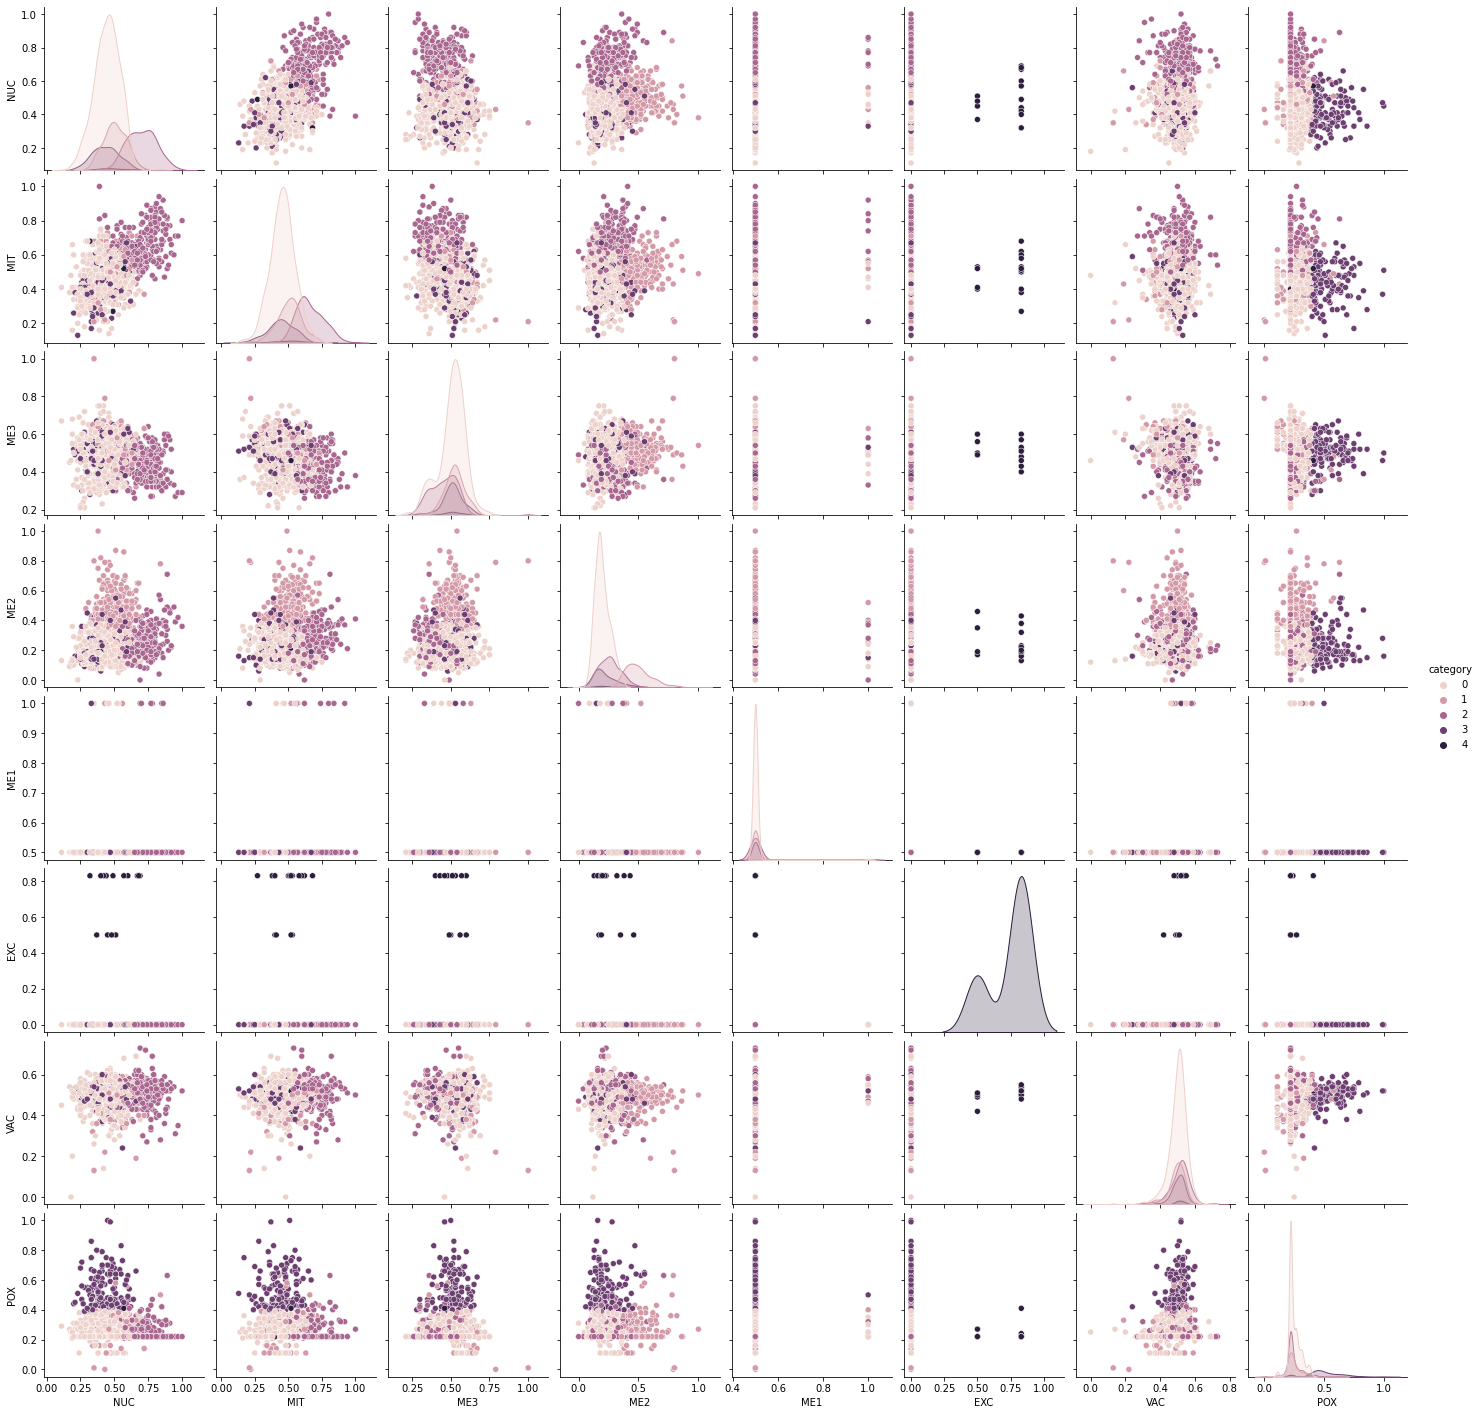

In [13]:
pairplot(data, hue = 'category')

Berdasarkan data yang tersedia, terapkan metode klasterisasi guna mengelompokkan tiap baris pada kelompok tertentu. Sehingga hasil akhir yang diminta adalah 1 kolom tambahan yang merupakan penentu baris tersebut adalah kategori/klaster yang mana. Untuk menjawab soal ini, silahkan simak materi pertemuan ke sepuluh yang membahas <i>predictive analytics</i> (<i>unsupervised learning/clustering</i>).

## 2. <i>Supervised Learning</i>

Setelah mendapatkan kategori untuk tiap baris pada data di atas, maka latih sebuah algoritma klasifikasi pada <i>dataset</i> yang barusan kalian olah untuk dapat memprediksi masukan baru. Untuk menjawab soal ini, silahkan simak materi pertemuan ke sembilan yang membahas <i>predictive analytics</i> (<i>supervised learning</i>).

In [14]:
kmean = KMeans(n_clusters = 5)
no_cyt['category'] = kmean.fit_predict(no_cyt)
no_cyt

NUC   MIT   ME3   ME2  ME1  EXC   VAC   POX  category
0     0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22         2
1     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22         3
2     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22         2
3     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22         3
4     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22         1
...    ...   ...   ...   ...  ...  ...   ...   ...       ...
1479  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22         2
1480  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47         0
1481  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22         2
1482  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39         3
1483  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22         2

[1484 rows x 9 columns]

In [15]:
knn = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(no_cyt[no_cyt.columns[:-1]], 
                                                    no_cyt['category'], 
                                                    test_size = 0.2)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
hasil_prediksi = knn.predict(x_test)
print(classification_report(hasil_prediksi, y_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.86      1.00      0.92        37
           2       0.89      0.98      0.93        49
           3       0.99      0.92      0.96       179
           4       1.00      1.00      1.00         4

    accuracy                           0.95       297
   macro avg       0.93      0.97      0.95       297
weighted avg       0.95      0.95      0.95       297



In [18]:
print(hasil_prediksi)
print(y_test.tolist())

[1 3 3 1 3 3 3 2 3 3 1 3 3 2 0 3 2 2 0 3 2 3 3 0 3 3 1 2 2 2 3 1 3 3 3 3 4
 3 3 2 3 3 0 1 1 3 2 0 2 3 3 1 2 3 3 3 3 3 3 2 3 3 0 0 3 0 3 3 2 3 3 3 3 3
 3 3 0 2 3 3 2 1 3 3 3 3 1 3 1 2 2 3 3 3 2 2 2 2 2 3 3 3 3 3 3 0 3 3 2 3 3
 4 2 0 2 3 1 2 3 2 3 3 3 3 3 2 3 3 2 3 0 3 3 1 3 0 3 3 0 3 1 1 3 3 3 3 1 1
 3 3 3 3 3 3 3 2 3 3 2 3 0 2 3 3 1 3 3 3 3 2 3 3 3 3 0 3 3 3 0 3 1 3 1 2 1
 3 0 1 3 3 3 2 3 3 3 3 3 0 3 2 4 1 3 2 3 3 1 3 1 3 1 2 3 3 3 3 3 3 3 3 3 3
 0 1 3 3 3 1 2 0 1 2 3 3 3 3 1 0 3 2 1 3 2 3 3 3 0 3 3 2 3 4 0 1 3 3 3 3 3
 0 2 3 1 3 2 3 3 3 1 3 3 0 3 2 2 1 3 3 3 0 3 3 1 3 3 3 0 3 3 3 3 3 3 1 3 3
 2]
[1, 3, 3, 1, 3, 3, 3, 2, 1, 3, 1, 3, 3, 2, 0, 3, 2, 2, 0, 3, 2, 3, 3, 0, 3, 3, 1, 2, 2, 2, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 0, 1, 1, 3, 2, 0, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 3, 3, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 0, 2, 3, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 0, 3, 3, 2, 0, 3, 4, 2, 0, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 0, 2,

In [30]:
knn.predict([[0.50, 0.43, 0.47, 0.13, 0.5, 0.0, 0.40, 0.34]])

array([3])

## 3. <i>Data Storytelling</i>

Carilah <i>dataset</i> yang hendak kalian gunakan untuk "bercerita" terkait penemuan wawasan yang kalian coba usahakan. Minimal 3 visualisasi yang menarik.

In [2]:
covid = pd.read_csv("province.csv", index_col=0)
covid

province_name                   island iso_code  \
province_id                                                                 
1                                  Aceh                  Sumatra       AC   
2                                  Bali  Kepulauan Nusa Tenggara       BA   
3                                Banten                     Jawa       BT   
4                              Bengkulu                  Sumatra       BE   
5                         DI Yogyakarta                     Jawa       YO   
6                           DKI Jakarta                     Jawa       JK   
7                             Gorontalo                 Sulawesi       GO   
8                                 Jambi                  Sumatra       JA   
9                            Jawa Barat                     Jawa       JB   
10                          Jawa Tengah                     Jawa       JT   
11                           Jawa Timur                     Jawa       JI   
12                     Kalimantan Barat               Kalimantan       KB   
13                   Kalimantan Selatan               Kalimantan       KS   
14                    Kalimantan Tengah               Kalimantan       KT   
15                     Kalimantan Timur               Kalimantan       KI   
16                     Kalimantan Utara               Kalimantan       KU   
17            Kepulauan Bangka Belitung                  Sumatra       BB   
18                       Kepulauan Riau                  Sumatra       KR   
19                              Lampung                  Sumatra       LA   
20                               Maluku         Kepulauan Maluku       MA   
21                         Maluku Utara         Kepulauan Maluku       MU   
22                  Nusa Tenggara Barat  Kepulauan Nusa Tenggara       NB   
23                  Nusa Tenggara Timur  Kepulauan Nusa Tenggara       NT   
24                                Papua                    Papua       PA   
25                          Papua Barat                    Papua       PB   
26                                 Riau                  Sumatra       RI   
27                       Sulawesi Barat                 Sulawesi       SR   
28                     Sulawesi Selatan                 Sulawesi       SN   
29                      Sulawesi Tengah                 Sulawesi       ST   
30                    Sulawesi Tenggara                 Sulawesi       SG   
31                       Sulawesi Utara                 Sulawesi       SA   
32                        Sumatra Barat                  Sumatra       SB   
33                      Sumatra Selatan                  Sumatra       SS   
34                        Sumatra Utara                  Sumatra       SU   

               capital_city  population  population_kmsquare  confirmed  \
province_id                                                               
1                Banda Aceh     4906835                   86          4   
2                  Denpasar     4104900                  738          9   
3                    Serang    11704877                 1298         84   
4                  Bengkulu     1844800                   93          0   
5                Yogyakarta     3553100                 1134         22   
6                   Jakarta    10012271                 1353        598   
7                 Gorontalo     1115633                   93          0   
8                     Jambi     3344400                   63          1   
9                   Bandung    46029668                 1306         98   
10                 Semarang    33522663                  986         43   
11                 Surabaya    38610202                  806         66   
12                Pontianak     4716093                   41          4   
13              Banjarmasin     3922790                  107          1   
14            Palangka Raya     2439858                   16          6   
15                Samarinda     3351432              

In [41]:
covid.head()

province_name                   island iso_code capital_city  \
province_id                                                                  
1                      Aceh                  Sumatra       AC   Banda Aceh   
2                      Bali  Kepulauan Nusa Tenggara       BA     Denpasar   
3                    Banten                     Jawa       BT       Serang   
4                  Bengkulu                  Sumatra       BE     Bengkulu   
5             DI Yogyakarta                     Jawa       YO   Yogyakarta   

             population  population_kmsquare  confirmed  deceased  released  \
province_id                                                                   
1               4906835                   86          4         0         0   
2               4104900                  738          9         2         0   
3              11704877                 1298         84         4         1   
4               1844800                   93          0         0         0   
5               3553100                 1134         22         2         1   

               longitude    latitude  
province_id                           
1              9.672.895   3.869.994  
2             11.512.255    -825.731  
3            106.160.889  -6.315.299  
4            102.315.674  -3.414.725  
5            110.390.625  -7.863.382

In [42]:
np.sum(covid.isnull())

province_name          0
island                 0
iso_code               0
capital_city           0
population             0
population_kmsquare    0
confirmed              0
deceased               0
released               0
longitude              0
latitude               0
dtype: int64

In [43]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 34
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_name        34 non-null     object
 1   island               34 non-null     object
 2   iso_code             34 non-null     object
 3   capital_city         34 non-null     object
 4   population           34 non-null     int64 
 5   population_kmsquare  34 non-null     int64 
 6   confirmed            34 non-null     int64 
 7   deceased             34 non-null     int64 
 8   released             34 non-null     int64 
 9   longitude            34 non-null     object
 10  latitude             34 non-null     object
dtypes: int64(5), object(6)
memory usage: 3.2+ KB


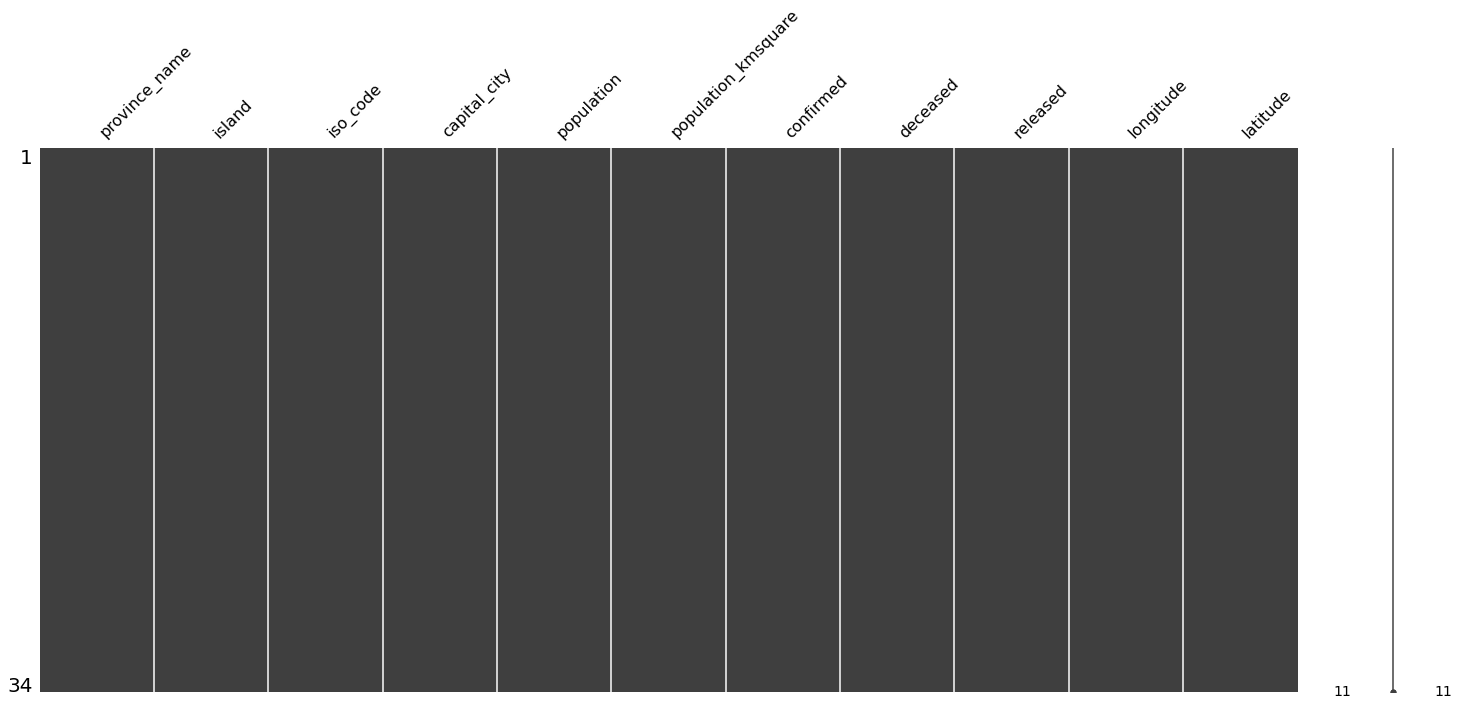

In [45]:
msno.matrix(covid)
plt.show()

In [46]:
covid.describe()

population  population_kmsquare   confirmed   deceased   released
count  3.400000e+01            34.000000   34.000000  34.000000  34.000000
mean   7.412293e+06           297.558824   29.911765   2.529412   1.352941
std    1.068707e+07           427.403733  103.257069   8.975506   5.476575
min    6.183840e+05             2.000000    0.000000   0.000000   0.000000
25%    2.034712e+06            47.250000    1.000000   0.000000   0.000000
50%    3.737945e+06            93.000000    3.500000   0.000000   0.000000
75%    7.503236e+06           234.500000    8.750000   1.000000   0.000000
max    4.602967e+07          1353.000000  598.000000  51.000000  31.000000

In [47]:
pulau = covid['island'].unique()
pulau

array(['Sumatra', 'Kepulauan Nusa Tenggara', 'Jawa', 'Sulawesi',
       'Kalimantan', 'Kepulauan Maluku', 'Papua'], dtype=object)

In [48]:
korona = covid[covid.confirmed==0]['province_name']
korona

province_id
4                       Bengkulu
7                      Gorontalo
16              Kalimantan Utara
17     Kepulauan Bangka Belitung
23           Nusa Tenggara Timur
25                   Papua Barat
27                Sulawesi Barat
Name: province_name, dtype: object

### Provinsi mana yang populasi km perseginya paling banyak?

In [52]:
top_10_konfirmasi = covid['province_name']

C:\Users\25and\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-68-ab6d96b23156>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pulau, rotation='90')


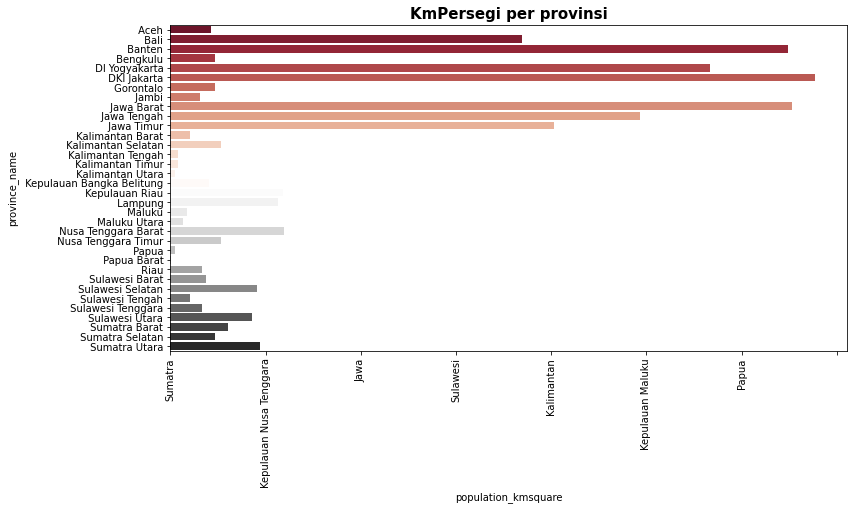

In [68]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(covid['population_kmsquare'], top_10_konfirmasi, ax=ax, palette="RdGy")
ax.set_xticklabels(pulau, rotation='90')
ax.set_title('KmPersegi per provinsi', fontsize=15, fontweight='bold')

plt.show()

In [3]:
import plotly.express as px
fig=plt.figure(figsize=(45,30))
fig=px.pie(covid, values='population', names='province_name',color_discrete_sequence=px.colors.sequential.RdBu,hole=.3)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

<Figure size 3240x2160 with 0 Axes>

In [113]:
fig=px.treemap(covid, path=['province_name'], values='confirmed',
              color='island', hover_data=['province_name'],
              color_continuous_scale='matter')
fig.show()

In [176]:
#__Persentase Kematian terhadap terkonfirmasi covid
a=1
for i in covid['confirmed']:
    if i > 0:
        mati = covid['deceased']
        if mati[a] > 0:
            hasil = mati[a]/i*100
            formata = "{0:.2f}".format(hasil)
            persentase = float(formata)
            print(persentase)
            covid['persentase'][a] = persentase
        else:
            print(0)
            covid['persentase'][a] = 0.0
    else:
        print(0)
        covid['persentase'][a] = 0.0
    a+=1

0
22.22
4.76
0
9.09
8.53
0
0
14.29
13.95
6.06
0
0
0
0
0
0
20.0
0
0
0
0
0
0
0
0
0
3.45
0
0
0
0
0
12.5


<ipython-input-176-8347b1dfdfdf>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-176-8347b1dfdfdf>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-176-8347b1dfdfdf>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
covid

province_name                   island iso_code  \
province_id                                                                 
1                                  Aceh                  Sumatra       AC   
2                                  Bali  Kepulauan Nusa Tenggara       BA   
3                                Banten                     Jawa       BT   
4                              Bengkulu                  Sumatra       BE   
5                         DI Yogyakarta                     Jawa       YO   
6                           DKI Jakarta                     Jawa       JK   
7                             Gorontalo                 Sulawesi       GO   
8                                 Jambi                  Sumatra       JA   
9                            Jawa Barat                     Jawa       JB   
10                          Jawa Tengah                     Jawa       JT   
11                           Jawa Timur                     Jawa       JI   
12                     Kalimantan Barat               Kalimantan       KB   
13                   Kalimantan Selatan               Kalimantan       KS   
14                    Kalimantan Tengah               Kalimantan       KT   
15                     Kalimantan Timur               Kalimantan       KI   
16                     Kalimantan Utara               Kalimantan       KU   
17            Kepulauan Bangka Belitung                  Sumatra       BB   
18                       Kepulauan Riau                  Sumatra       KR   
19                              Lampung                  Sumatra       LA   
20                               Maluku         Kepulauan Maluku       MA   
21                         Maluku Utara         Kepulauan Maluku       MU   
22                  Nusa Tenggara Barat  Kepulauan Nusa Tenggara       NB   
23                  Nusa Tenggara Timur  Kepulauan Nusa Tenggara       NT   
24                                Papua                    Papua       PA   
25                          Papua Barat                    Papua       PB   
26                                 Riau                  Sumatra       RI   
27                       Sulawesi Barat                 Sulawesi       SR   
28                     Sulawesi Selatan                 Sulawesi       SN   
29                      Sulawesi Tengah                 Sulawesi       ST   
30                    Sulawesi Tenggara                 Sulawesi       SG   
31                       Sulawesi Utara                 Sulawesi       SA   
32                        Sumatra Barat                  Sumatra       SB   
33                      Sumatra Selatan                  Sumatra       SS   
34                        Sumatra Utara                  Sumatra       SU   

               capital_city  population  population_kmsquare  confirmed  \
province_id                                                               
1                Banda Aceh     4906835                   86          4   
2                  Denpasar     4104900                  738          9   
3                    Serang    11704877                 1298         84   
4                  Bengkulu     1844800                   93          0   
5                Yogyakarta     3553100                 1134         22   
6                   Jakarta    10012271                 1353        598   
7                 Gorontalo     1115633                   93          0   
8                     Jambi     3344400                   63          1   
9                   Bandung    46029668                 1306         98   
10                 Semarang    33522663                  986         43   
11                 Surabaya    38610202                  806         66   
12                Pontianak     4716093                   41          4   
13              Banjarmasin     3922790                  107          1   
14            Palangka Raya     2439858                   16          6   
15                Samarinda     3351432              

In [178]:
covid['persentase']=pd.to_numeric(covid['persentase'])


In [179]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   province_name        34 non-null     object 
 1   island               34 non-null     object 
 2   iso_code             34 non-null     object 
 3   capital_city         34 non-null     object 
 4   population           34 non-null     int64  
 5   population_kmsquare  34 non-null     int64  
 6   confirmed            34 non-null     int64  
 7   deceased             34 non-null     int64  
 8   released             34 non-null     int64  
 9   longitude            34 non-null     object 
 10  latitude             34 non-null     object 
 11  persentase           34 non-null     float64
dtypes: float64(1), int64(5), object(6)
memory usage: 4.7+ KB


<AxesSubplot:xlabel='island', ylabel='province_name'>

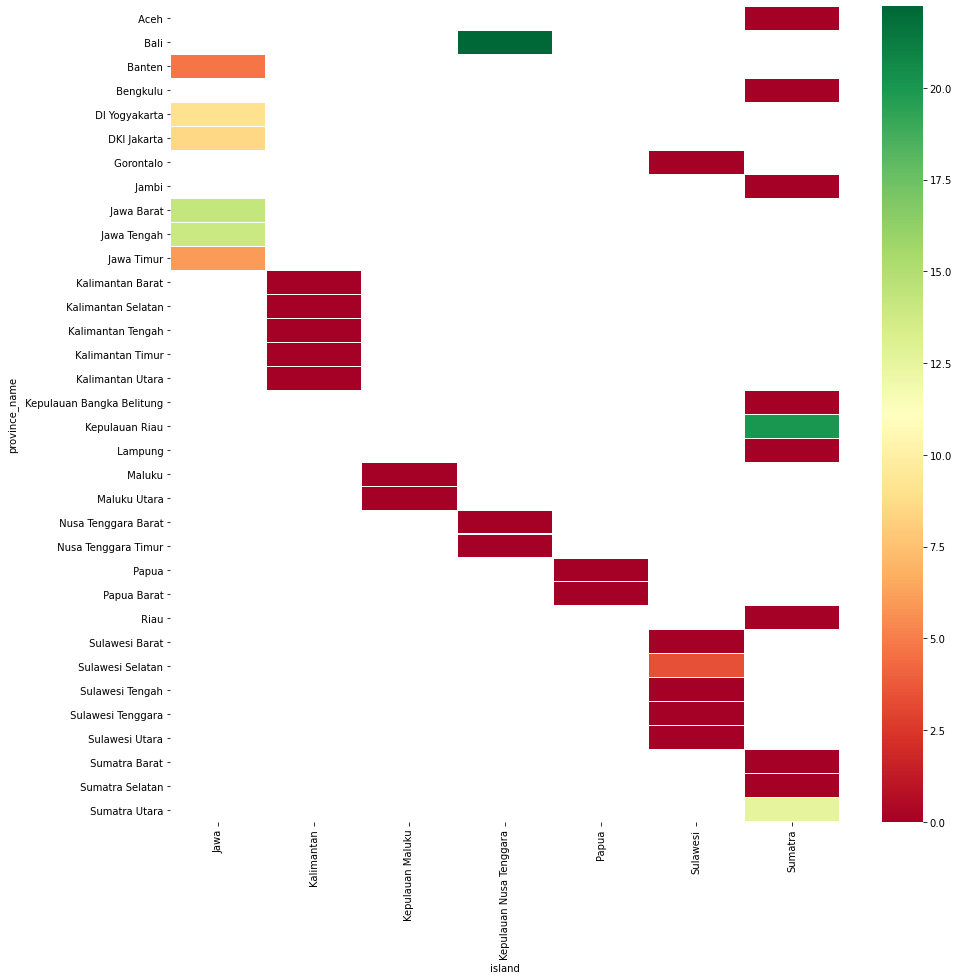

In [180]:
fig, ax = plt.subplots(figsize=(15,15))
tree=pd.pivot_table(covid, values='persentase',
                   index=['province_name'],
                   columns='island')
sns.heatmap(tree, cmap="RdYlGn", linewidths=0.05)